In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

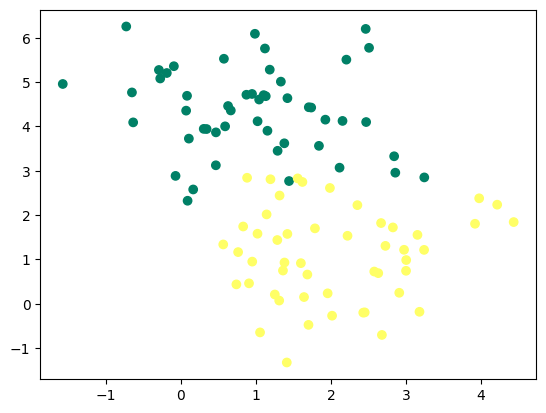

In [2]:
X, y = make_blobs(n_samples=100, n_features=2,centers=2,random_state=0)
y = y.reshape((y.shape[0],1))

plt.scatter(X[:,0],X[:,1], c=y,cmap='summer')
plt.show()

In [3]:
def init(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return(W,b)

In [11]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1/(1+np.exp(-Z))
    return A

In [19]:
def log_loss(A,y): #----> fonction cout
    return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

In [24]:
def gradients(A,X,y):
    dw = 1/len(y) * np.dot(X.T, A-y)
    db = 1/len(y) * np.sum(A-y)
    return(dw,db)

In [21]:
def update(dw,db,W,b,learning_rate):
    W = W - learning_rate * dw
    b = b - learning_rate * db
    return (W,b)

In [143]:
def predict(X,W,b):
    A = model(X,W,b)
    print(A)
    return A >= 0.5

In [28]:
from sklearn.metrics import accuracy_score

In [40]:
def firstneuron(X,y, learning_rate=0.1,n_iter=100):
    W,b = init(X)
    loss = []
    for i in range(n_iter):
        A = model(X,W,b)
        loss.append(log_loss(A,y))
        dw,db = gradients(A,X,y)
        W,b = update(dw,db,W,b,learning_rate)
    
    y_pred = predict(X,W,b)
    print(accuracy_score(y,y_pred))

    plt.plot(loss)
    plt.show()
    return(W,b)
    

In [ ]:
W, b = firstneuron(X,y,0.01,1000)

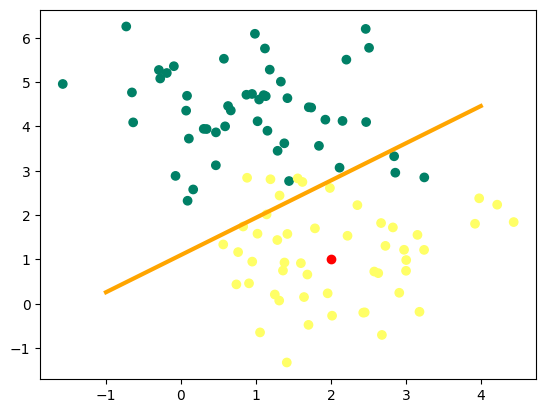

[0.88032396]


array([ True])

In [146]:
new = np.array([2,1])
x0 = np.linspace(-1,4,100)
x1 = (-W[0] * x0-b) / W[1]

plt.scatter(X[:,0],X[:,1], c=y,cmap='summer')
plt.scatter(new[0],new[1], c ='r')
plt.plot(x0,x1, c='orange', lw=3)
plt.show()
predict(new,W,b)